Project: Milestone 2
Cleaning/Formatting Flat File Source
Perform at least 5 data transformation and/or cleansing steps to your flat file data. For example:

Replace Headers
Format data into a more readable format
Identify outliers and bad data
Find duplicates
Fix casing or inconsistent values
Conduct Fuzzy Matching
You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.

Milestone 2 is due Sunday, by Midnight of Week 4. Refer to the rubric for more grading detail.

Import the necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data

In [3]:
df = pd.read_excel("C:/Users/pro_v/Desktop/datasets_2647_4395_PoliceKillingsUS (1).xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [4]:
df.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01 00:00:00,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01 00:00:00,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-03-01 00:00:00,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-04-01 00:00:00,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-04-01 00:00:00,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,2015-04-01 00:00:00,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,2015-05-01 00:00:00,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,2015-06-01 00:00:00,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,2015-06-01 00:00:00,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,2015-06-01 00:00:00,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


Replace Headers

In [5]:
df.columns = ['Uniqueid','Name','Date','Way_of_Death','Weapon','Age','Sex','Race','City','State','Mental_illness','Threat','Escape','Body_cam']

In [6]:
df

,Uniqueid,Name,Date,Way_of_Death,Weapon,Age,Sex,Race,City,State,Mental_illness,Threat,Escape,Body_cam
0,3,Tim Elliot,2015-02-01 00:00:00,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01 00:00:00,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-03-01 00:00:00,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-04-01 00:00:00,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-04-01 00:00:00,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


Missing Data

In [7]:
for c in df.columns:
    miss = df[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has NO missing value!".format(c))

Uniqueid has NO missing value!
Name has NO missing value!
Date has NO missing value!
Way_of_Death has NO missing value!
Weapon has 9 missing value(s)
Age has 77 missing value(s)
Sex has NO missing value!
Race has 195 missing value(s)
City has NO missing value!
State has NO missing value!
Mental_illness has NO missing value!
Threat has NO missing value!
Escape has 65 missing value(s)
Body_cam has NO missing value!


Check For Duplicated Data

In [8]:
for m in df.columns:
    dup = df[m].duplicated().sum()
    if dup>0:
        print("{} has {} duplicated data".format(m,dup))
    else:
        print("{} has NO duplicated data!".format(m))

Uniqueid has NO duplicated data!
Name has 54 duplicated data
Date has 1656 duplicated data
Way_of_Death has 2533 duplicated data
Weapon has 2466 duplicated data
Age has 2461 duplicated data
Sex has 2533 duplicated data
Race has 2528 duplicated data
City has 1118 duplicated data
State has 2484 duplicated data
Mental_illness has 2533 duplicated data
Threat has 2532 duplicated data
Escape has 2530 duplicated data
Body_cam has 2533 duplicated data


Split the Name and Add to the Data

In [9]:
df_1 = df.Name.str.split(" ", n=1, expand=True)
df["First Name"]=df_1[0]
df["Last Name"]= df_1[1]
df

,Uniqueid,Name,Date,Way_of_Death,Weapon,Age,Sex,Race,City,State,Mental_illness,Threat,Escape,Body_cam,First Name,Last Name
0,3,Tim Elliot,2015-02-01 00:00:00,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Tim,Elliot
1,4,Lewis Lee Lembke,2015-02-01 00:00:00,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Lewis,Lee Lembke
2,5,John Paul Quintero,2015-03-01 00:00:00,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,John,Paul Quintero
3,8,Matthew Hoffman,2015-04-01 00:00:00,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Matthew,Hoffman
4,9,Michael Rodriguez,2015-04-01 00:00:00,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Michael,Rodriguez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False,Rodney,E. Jacobs
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False,TK,TK
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False,Dennis,W. Robinson
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True,Isaiah,Tucker


Dropping Old Name

In [10]:
df.drop(columns=["Name"], inplace=True)
df

,Uniqueid,Date,Way_of_Death,Weapon,Age,Sex,Race,City,State,Mental_illness,Threat,Escape,Body_cam,First Name,Last Name
0,3,2015-02-01 00:00:00,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Tim,Elliot
1,4,2015-02-01 00:00:00,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Lewis,Lee Lembke
2,5,2015-03-01 00:00:00,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,John,Paul Quintero
3,8,2015-04-01 00:00:00,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Matthew,Hoffman
4,9,2015-04-01 00:00:00,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Michael,Rodriguez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False,Rodney,E. Jacobs
2531,2813,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False,TK,TK
2532,2818,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False,Dennis,W. Robinson
2533,2817,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True,Isaiah,Tucker


Outliers Dectection using a histogram and a boxplot

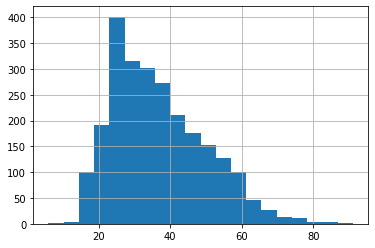

In [11]:
df['Age'].hist(bins=20)

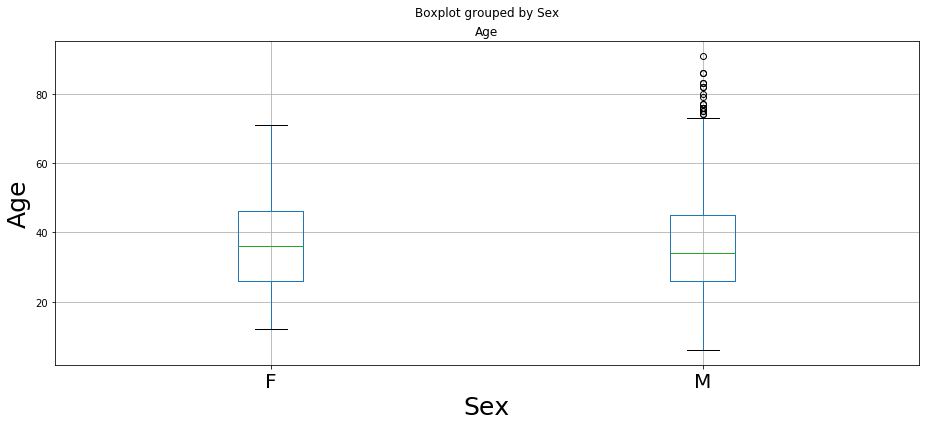

In [12]:
df.boxplot(column='Age', by='Sex', figsize=(15,6))
plt.xticks(fontsize = 20)
plt.xlabel('Sex', fontsize=25)
plt.ylabel('Age', fontsize=25)
plt.show()

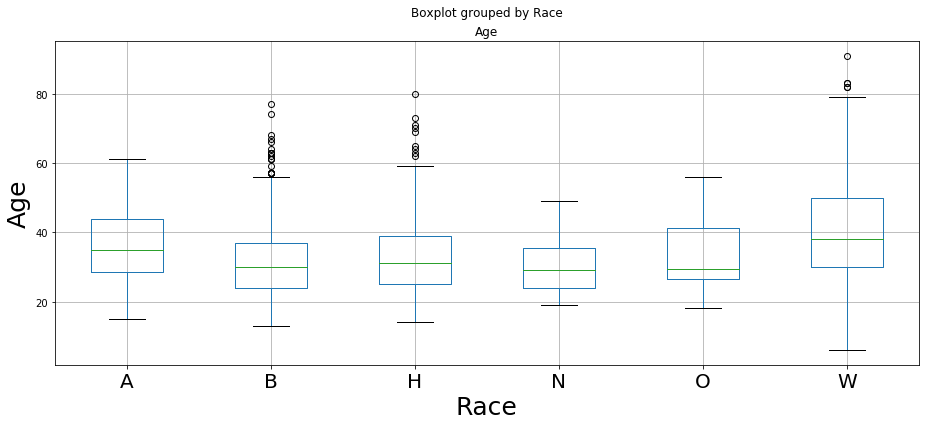

In [13]:
df.boxplot(column='Age', by='Race', figsize=(15,6))
plt.xticks(fontsize = 20)
plt.xlabel('Race', fontsize=25)
plt.ylabel('Age', fontsize=25)
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Uniqueid        2535 non-null   int64  
 1   Date            2535 non-null   object 
 2   Way_of_Death    2535 non-null   object 
 3   Weapon          2526 non-null   object 
 4   Age             2458 non-null   float64
 5   Sex             2535 non-null   object 
 6   Race            2340 non-null   object 
 7   City            2535 non-null   object 
 8   State           2535 non-null   object 
 9   Mental_illness  2535 non-null   bool   
 10  Threat          2535 non-null   object 
 11  Escape          2470 non-null   object 
 12  Body_cam        2535 non-null   bool   
 13  First Name      2535 non-null   object 
 14  Last Name       2535 non-null   object 
dtypes: bool(2), float64(1), int64(1), object(11)
memory usage: 262.5+ KB


In [15]:
df.rename(columns={'Date': 'Year'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Uniqueid        2535 non-null   int64  
 1   Year            2535 non-null   object 
 2   Way_of_Death    2535 non-null   object 
 3   Weapon          2526 non-null   object 
 4   Age             2458 non-null   float64
 5   Sex             2535 non-null   object 
 6   Race            2340 non-null   object 
 7   City            2535 non-null   object 
 8   State           2535 non-null   object 
 9   Mental_illness  2535 non-null   bool   
 10  Threat          2535 non-null   object 
 11  Escape          2470 non-null   object 
 12  Body_cam        2535 non-null   bool   
 13  First Name      2535 non-null   object 
 14  Last Name       2535 non-null   object 
dtypes: bool(2), float64(1), int64(1), object(11)
memory usage: 262.5+ KB


In [16]:
df

,Uniqueid,Year,Way_of_Death,Weapon,Age,Sex,Race,City,State,Mental_illness,Threat,Escape,Body_cam,First Name,Last Name
0,3,2015-02-01 00:00:00,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Tim,Elliot
1,4,2015-02-01 00:00:00,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Lewis,Lee Lembke
2,5,2015-03-01 00:00:00,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,John,Paul Quintero
3,8,2015-04-01 00:00:00,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Matthew,Hoffman
4,9,2015-04-01 00:00:00,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Michael,Rodriguez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False,Rodney,E. Jacobs
2531,2813,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False,TK,TK
2532,2818,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False,Dennis,W. Robinson
2533,2817,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True,Isaiah,Tucker
